<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Linear_Regression(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path=r"/content/Salary_Data.csv"
data=pd.read_csv(path)
data.head()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]






In [3]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [4]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [6]:
X_train


,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [7]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [8]:
y_train

27    112635
11     55794
17     83088
22    101302
5      56642
16     66029
8      64445
14     61111
23    113812
20     91738
1      46205
29    121872
6      60150
4      39891
18     81363
19     93940
9      57189
7      54445
25    105582
3      43525
0      39343
21     98273
15     67938
12     56957
Name: Salary, dtype: int64

In [9]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
Name: Salary, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [11]:
y_pred=model.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [12]:
y_pred=model.predict(X_test)
y_pred
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R^2 Score:',r2)

Mean Squared Error: 12823412.298126549
R^2 Score: 0.988169515729126


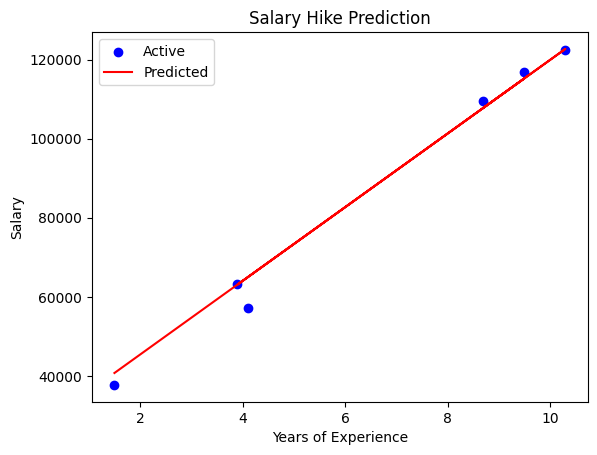

In [13]:
plt.scatter(X_test,y_test,color='b',label='Active')
plt.plot(X_test,y_pred,color='red',label="Predicted")
plt.title('Salary Hike Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()